<a href="https://colab.research.google.com/github/gkv856/KaggleData/blob/main/S1_prepare_embedding_model_AutoVC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Description


1.   This notebook is part1 of Auto voice cloning (AVC) project
2.   In this notebook we will use [this github repo](https://github.com/gkv856/end2end_auto_voice_conversion)
3.   First we will create mel-spectrogram from the raw audio
4.   Then we will train Embedding model using GE2E loss
5.   Then we will test the model

* [How to create embedding model using 'Generalized End-to-End Loss for Speaker Verification' 
(GE2E)](https://github.com/gkv856/KaggleData/blob/main/S1_prepare_embedding_model_AutoVC.ipynb)
* [Paper used](https://arxiv.org/abs/1710.10467)


# Installing dependencies

In [12]:
pip install webrtcvad

# Clone the git repository

In [13]:
!git clone https://github.com/gkv856/end2end_auto_voice_conversion.git

Cloning into 'end2end_auto_voice_conversion'...
remote: Enumerating objects: 692, done.
remote: Counting objects: 100% (692/692), done.
remote: Compressing objects: 100% (505/505), done.
remote: Total 692 (delta 240), reused 595 (delta 143), pack-reused 0
Receiving objects: 100% (692/692), 261.27 MiB | 27.44 MiB/s, done.
Resolving deltas: 100% (240/240), done.
Checking out files: 100% (213/213), done.


In [14]:
!mv end2end_auto_voice_conversion AVC

# ACTION REQUIRED:
**Rename the downloaded folder from "end2end_auto_voice_conversion" to "AVC"**

# Couple of manual changes
1. Double click and open 'constants.py' file located at '/content/AVC/strings/constants.py'
2. Change line 6 from 'from utils.dict_to_dot import GetDictWithDotNotation' to: "from AVC.utils.dict_to_dot import GetDictWithDotNotation' as mentioned above, we need to this for every package not found error
3. Change line 8 to: PROJECT_NAME = "AVC"
4. Change line 10 to: current_dir = Path("/content/AVC/strings/constants.py")

In [15]:
from AVC.strings.constants import hp

# Create mel-spectrogram from raw data

In [16]:
from AVC.s1_data_prep.audio_to_spectrogram import CreateSpectrogram
from AVC.s2_generalized_end2end_loss_GE2E.s4_train_embed_model import TrainEmbedModel

In [17]:
# # dataset1
# cr_obj = CreateSpectrogram(hp)
# cr_obj.save_spectrogram_tisv()

In [18]:
# # seconda dataset
# hp.raw_audio.raw_audio_path = "/content/AVC/static/raw_data/librispeech_test-other"
# # step 1 prepare the spectrogram from the raw audio file
# cr_obj = CreateSpectrogram(hp)
# cr_obj.save_spectrogram_tisv()

# Train the Embedding model using GE2E loss

In [19]:

# step2 of the Auto voice cloning is to: train the embedding model
# to get a user's embedding or 256 dim vector representing user's speaking style

hp.m_ge2e.training_epochs = 1000
hp.m_ge2e.checkpoint_interval = 300
hp.m_ge2e.min_test_loss = 4

hp.m_ge2e.training_N = 4
hp.m_ge2e.training_M = 16

hp.m_ge2e.test_N = 4
hp.m_ge2e.test_M = 16

hp.m_ge2e.lr = 0.05
# creating training object
train_emb_model_obj = TrainEmbedModel(hp)

# training the model
model, train_loss, test_loss = train_emb_model_obj.train_model(lr_reduce=300, 
                                                               epoch_print=100, 
                                                               dot_print=10)
print(2)

Epoch:[100/1000] .......... Train_Loss:19.3483	 Test_Loss:12.5612	00:00:30
Epoch:[200/1000] .......... Train_Loss:3.7000	 Test_Loss:14.7553	00:00:30
Epoch:[300/1000] .......... Train_Loss:7.1967	 Test_Loss:14.4462	00:00:29
Reducing learning rate from 0.05 to 0.025
Model saved as 'ckpt_epoch_300_L_7.1967.pth'
Epoch:[400/1000] .......... Train_Loss:4.7406	 Test_Loss:2.5148	00:00:29
Epoch:[500/1000] .......... Train_Loss:1.0815	 Test_Loss:2.4270	00:00:29
Epoch:[600/1000] .......... Train_Loss:0.2688	 Test_Loss:0.9318	00:00:30
Reducing learning rate from 0.025 to 0.0125
Model saved as 'ckpt_epoch_600_L_0.2688.pth'
Epoch:[700/1000] .......... Train_Loss:0.0046	 Test_Loss:1.5411	00:00:30
Epoch:[800/1000] .......... Train_Loss:0.8028	 Test_Loss:0.0003	00:00:29
Epoch:[900/1000] .......... Train_Loss:0.0024	 Test_Loss:0.0002	00:00:30
Reducing learning rate from 0.0125 to 0.00625
Model saved as 'ckpt_epoch_900_L_0.0024.pth'
Epoch:[1000/1000] .......... Train_Loss:0.0003	 Test_Loss:0.0001	00:00:3

# Load pre-trained weights and test the embedding model

In [20]:
from AVC.s2_generalized_end2end_loss_GE2E.s5_eval_model import calculate_ERR, plot_scatter
from AVC.s2_generalized_end2end_loss_GE2E.s2_model_GE2E_loss_speach_embed import  get_pre_trained_embedding_model

In [22]:
# loading a pre-trained model

hp.m_ge2e.best_model_path = "/content/AVC/static/model_chk_pts/ge2e/m_best_900_L_0.0002.pth"
model = get_pre_trained_embedding_model(hp)

Pre-trained model loaded /content/AVC/static/model_chk_pts/ge2e/m_best_900_L_0.0002.pth


In [26]:
#calculating ERR
# calculate_ERR(model, hp, 4, 8)

In [23]:
def plot_scatter_with_diff_spr_nums(model):
  print("\n\nUsing '4' speakers")
  num_speakers = 4
  num_utter = 16
  # plotting speaker embeddings
  plot_scatter(model, hp, num_speakers, num_utter)

  print("\n\nUsing '6' speakers")
  num_speakers = 6
  num_utter = 32
  plot_scatter(model, hp, num_speakers, num_utter)

  print("\n\nUsing '10' speakers")
  num_speakers = 10
  num_utter = 32
  plot_scatter(model, hp, num_speakers, num_utter)
    



Using '4' speakers


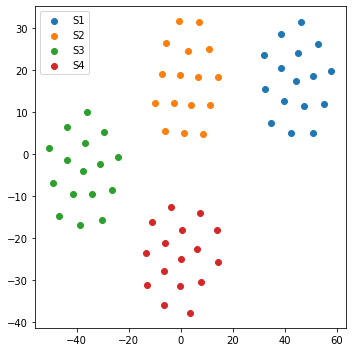

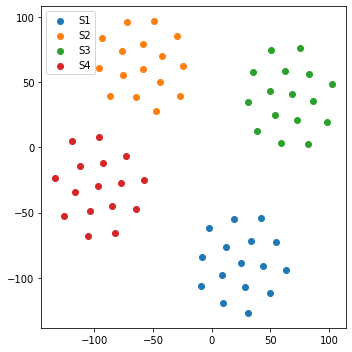

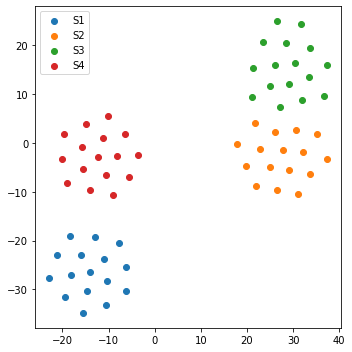



Using '6' speakers


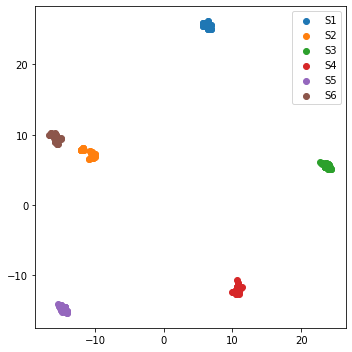

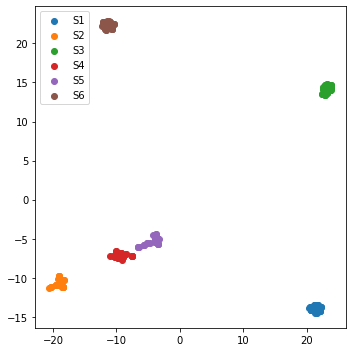



Using '10' speakers


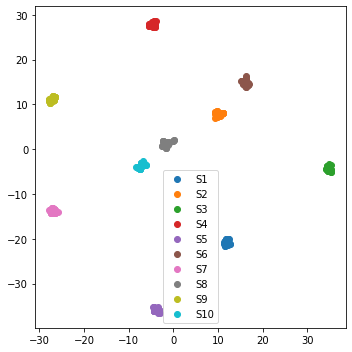

In [24]:
plot_scatter_with_diff_spr_nums(model)

# Embedding model test with Final Epoch weights

Pre-trained model loaded /content/AVC/static/model_chk_pts/ge2e/final_epoch_1000_L_0.0003.pth


Using '4' speakers


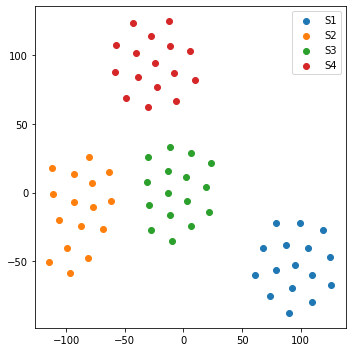

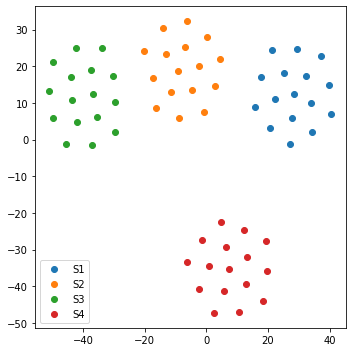

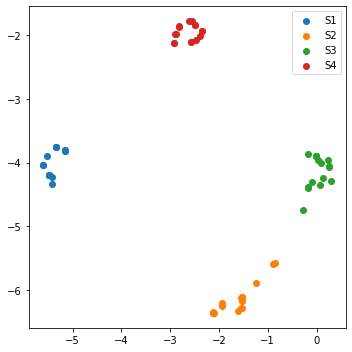



Using '6' speakers


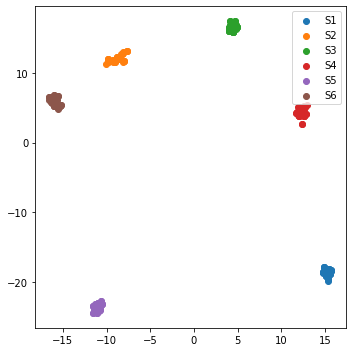

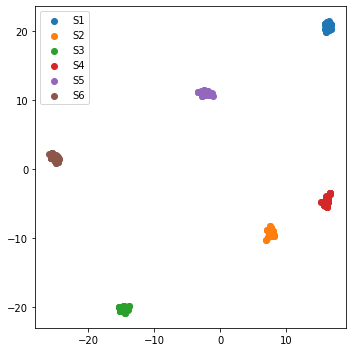



Using '10' speakers


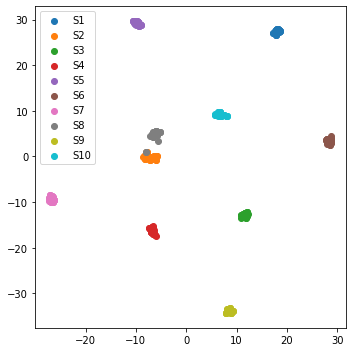

In [25]:
# loading a pre-trained model
hp.m_ge2e.best_model_path = "/content/AVC/static/model_chk_pts/ge2e/final_epoch_1000_L_0.0003.pth"
final_model = get_pre_trained_embedding_model(hp)
plot_scatter_with_diff_spr_nums(final_model)